In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series

In [8]:
user_data = pd.read_csv("C:/Users/HP/Downloads/User_data.csv")
print(csv_data.head())

  User ID      User Name  Age  Location Registration Date         Phone  \
0    U001  Alice Johnson   28  New York  15-01-2023 00:00  123-456-7890   
1    U001  Alice Johnson   28  New York  15-01-2023 00:00  123-456-7890   
2    U001  Alice Johnson   28  New York  15-01-2023 00:00  123-456-7890   
3    U001  Alice Johnson   28  New York  15-01-2023 00:00  123-456-7890   
4    U001  Alice Johnson   28  New York  15-01-2023 00:00  123-456-7890   

             Email Favourite Meal  Total Orders Session ID  ... Order ID  \
0  alice@email.com         Dinner            12       S001  ...   1001.0   
1  alice@email.com         Dinner            12       S001  ...   1004.0   
2  alice@email.com         Dinner            12       S001  ...   1009.0   
3  alice@email.com         Dinner            12       S004  ...   1001.0   
4  alice@email.com         Dinner            12       S004  ...   1004.0   

  User ID.2        Order Date Meal Type.1      Dish Name.1  Order Status  \
0      U001  01-

In [10]:
print(user_data.columns)

Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favourite Meal', 'Total Orders', 'Session ID', 'User ID.1',
       'Dish Name', 'Meal Type', 'Session Start', 'Session End',
       'Duration (mins)', 'Session Rating', 'Order ID', 'User ID.2',
       'Order Date', 'Meal Type.1', 'Dish Name.1', 'Order Status',
       'Amount (USD)', 'Time of Day', 'Rating', 'Session ID.1'],
      dtype='object')


In [13]:
print(user_data.isnull().sum())
user_data.fillna("Unknown", inplace=True)

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favourite Meal       0
Total Orders         0
Session ID           2
User ID.1            2
Dish Name            2
Meal Type            2
Session Start        2
Session End          2
Duration (mins)      2
Session Rating       2
Order ID             2
User ID.2            2
Order Date           2
Meal Type.1          2
Dish Name.1          2
Order Status         2
Amount (USD)         2
Time of Day          2
Rating               2
Session ID.1         2
dtype: int64


In [14]:
print(user_data.duplicated().sum())
user_data.drop_duplicates(inplace=True)

0


In [50]:
user_data['Registration Date'] = pd.to_datetime(user_data['Registration Date'], errors='coerce')
user_data['Order Date'] = pd.to_datetime(user_data['Order Date'], errors='coerce')

user_data['Session Rating'] = pd.to_numeric(user_data['Session Rating'], errors='coerce')
user_data['Amount (USD)'] = pd.to_numeric(user_data['Amount (USD)'], errors='coerce')
user_data['Rating'] = pd.to_numeric(user_data['Rating'], errors='coerce')

In [35]:
##Unique Users
unique_users = user_data['User ID'].nunique()
print(f"Total unique users: {unique_users}")

Total unique users: 10


In [36]:
##Top 5 Dishes
top_dishes = user_data['Dish Name'].value_counts().head(5)
print("Top 5 Dishes:\n", top_dishes)

Top 5 Dishes:
 Spaghetti          9
Grilled Chicken    9
Caesar Salad       7
Pancakes           6
Veggie Burger      4
Name: Dish Name, dtype: int64


In [37]:
##Total revenue
total_revenue = user_data['Amount (USD)'].sum()
print(f"Total Revenue: ${total_revenue}")

Total Revenue: $420.0


In [38]:
##Time based analysis
orders_by_time = user_data['Time of Day'].value_counts()
print("Orders by Time of Day:\n", orders_by_time)

Orders by Time of Day:
 Night      18
Day        11
Morning     9
Unknown     2
Name: Time of Day, dtype: int64


In [39]:
##Average Session Rating
avg_session_rating = user_data['Session Rating'].mean()
print(f"Average Session Rating: {avg_session_rating}")

Average Session Rating: 4.48157894736842


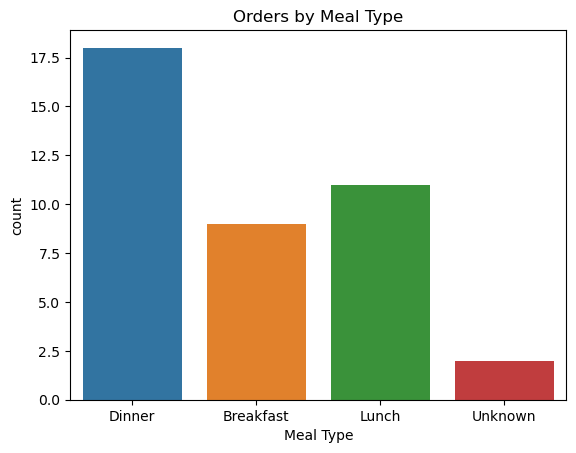

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

#Visualization of orders by meal type
sns.countplot(x='Meal Type', data=user_data)
plt.title("Orders by Meal Type")
plt.show()

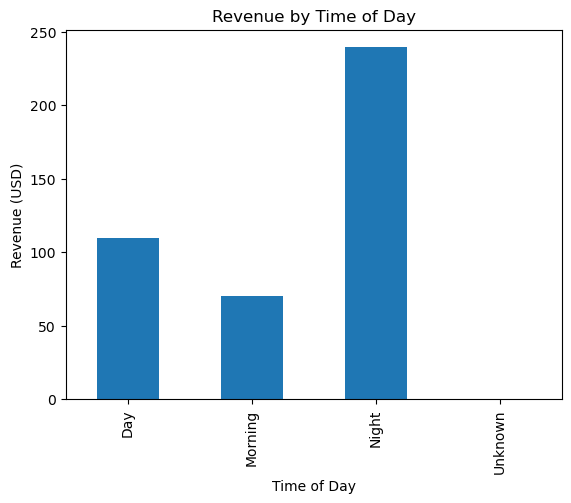

In [46]:
##Revenue by meal of day
revenue_time = user_data.groupby('Time of Day')['Amount (USD)'].sum()
revenue_time.plot(kind='bar')
plt.title("Revenue by Time of Day")
plt.ylabel("Revenue (USD)")
plt.show()

In [51]:
##Average rating per meal type
avg_rating_meal = user_data.groupby('Meal Type')['Rating'].mean()
print(avg_rating_meal)

Meal Type
Breakfast    3.333333
Dinner       3.888889
Lunch        3.272727
Unknown           NaN
Name: Rating, dtype: float64


In [52]:
##Pivot Table for User Orders
user_order_summary = user_data.pivot_table(index='User ID', values='Amount (USD)', aggfunc='sum')
print(user_order_summary)

         Amount (USD)
User ID              
U001            105.0
U002             93.0
U003             96.0
U004             43.0
U005             45.0
U006             13.0
U007             14.0
U008             11.0
U009              0.0
U010              0.0
